<a href="https://colab.research.google.com/github/subandwho/tensorflow/blob/main/fOODvISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-12 08:46:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.188.208, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   262MB/s    in 0.4s    

2021-07-12 08:46:21 (262 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [13]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [14]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [15]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder +"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('Off')
  print(f"Image shape : {img.shape}")
  return img

['1524655.jpg']
Image shape : (512, 512, 3)


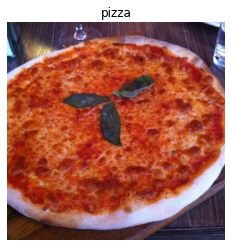

In [16]:
img = view_random_image(target_dir="pizza_steak/train/", target_class = "pizza")

In [17]:
import tensorflow as tf
img = tf.constant(img)
img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 20,  40,  51],
        [ 26,  45,  59],
        [ 29,  48,  63],
        ...,
        [154, 173, 239],
        [166, 184, 250],
        [167, 185, 251]],

       [[ 10,  30,  41],
        [ 20,  39,  53],
        [ 24,  41,  57],
        ...,
        [155, 175, 238],
        [168, 186, 250],
        [170, 188, 252]],

       [[ 11,  29,  41],
        [ 21,  39,  53],
        [ 18,  35,  51],
        ...,
        [157, 175, 237],
        [166, 184, 248],
        [170, 185, 250]],

       ...,

       [[ 35,  21,  10],
        [ 43,  29,  18],
        [ 49,  32,  22],
        ...,
        [ 42,  46,  75],
        [ 35,  36,  66],
        [ 25,  26,  56]],

       [[ 29,  15,   6],
        [ 42,  28,  19],
        [ 55,  38,  28],
        ...,
        [ 42,  46,  75],
        [ 35,  39,  68],
        [ 33,  37,  66]],

       [[ 39,  25,  16],
        [ 44,  30,  21],
        [ 45,  31,  22],
        ...,
        [ 44,  48,  7

In [18]:
img/255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.07843138, 0.15686275, 0.2       ],
        [0.10196079, 0.1764706 , 0.23137255],
        [0.11372549, 0.1882353 , 0.24705882],
        ...,
        [0.6039216 , 0.6784314 , 0.9372549 ],
        [0.6509804 , 0.72156864, 0.98039216],
        [0.654902  , 0.7254902 , 0.9843137 ]],

       [[0.03921569, 0.11764706, 0.16078432],
        [0.07843138, 0.15294118, 0.20784314],
        [0.09411765, 0.16078432, 0.22352941],
        ...,
        [0.60784316, 0.6862745 , 0.93333334],
        [0.65882355, 0.7294118 , 0.98039216],
        [0.6666667 , 0.7372549 , 0.9882353 ]],

       [[0.04313726, 0.11372549, 0.16078432],
        [0.08235294, 0.15294118, 0.20784314],
        [0.07058824, 0.13725491, 0.2       ],
        ...,
        [0.6156863 , 0.6862745 , 0.92941177],
        [0.6509804 , 0.72156864, 0.972549  ],
        [0.6666667 , 0.7254902 , 0.98039216]],

       ...,

       [[0.13725491, 0.08235294, 0.03921569],
        [0.16

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size = 32, target_size = (224, 224), class_mode = "binary", seed = 42 )
valid_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size= 32, target_size=(224, 224), class_mode = 'binary', seed = 42) 
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)), 
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'), 
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')])
model_1.compile(loss = "binary_crossentropy",
               optimizer = 'Adam', metrics = ['accuracy'] )
model_1.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 201ms/step - loss: 0.5628 - accuracy: 0.7107 - val_loss: 0.4064 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4269 - accuracy: 0.7993 - val_loss: 0.3592 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3873 - accuracy: 0.8347 - val_loss: 0.3290 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3484 - accuracy: 0.8533 - val_loss: 0.2918 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3052 - accuracy: 0.8787 - val_loss: 0.2955 - val_accuracy: 0.8720


In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [21]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)), 
                                     tf.keras.layers.Dense(4, activation = 'relu'),
                                     tf.keras.layers.Dense(4, activation = 'relu'),
                                     tf.keras.layers.Dense(1, activation = 'sigmoid')])
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'])
history2 = model_2.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 1.2557 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [22]:
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)), 
                                     tf.keras.layers.Dense(100, activation = 'relu'),
                                     tf.keras.layers.Dense(100, activation = 'relu'),
                                     tf.keras.layers.Dense(100, activation = 'relu'),
                                     tf.keras.layers.Dense(1, activation = 'sigmoid')])
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'])
history3 = model_3.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 2.4262 - accuracy: 0.6520 - val_loss: 0.6907 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 1.6974 - accuracy: 0.6547 - val_loss: 0.5958 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.8998 - accuracy: 0.7020 - val_loss: 0.9726 - val_accuracy: 0.6880
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6383 - accuracy: 0.7480 - val_loss: 0.5474 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5305 - accuracy: 0.7767 - val_loss: 0.4217 - val_accuracy: 0.8020


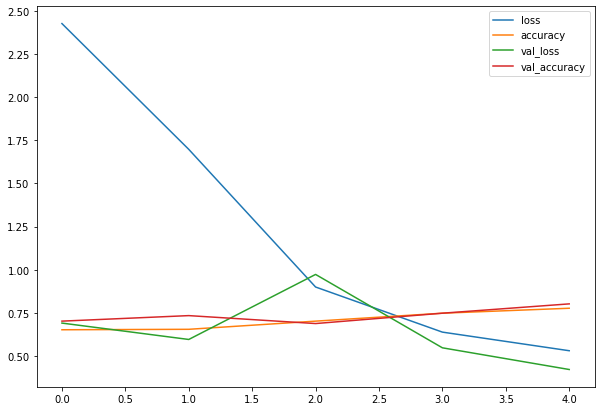

In [23]:
import pandas as pd
pd.DataFrame(history3.history).plot(figsize=(10,7))

In [24]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label = 'Val Loss')
  plt.title('Loss')
  plt.figure()
  plt.plot(epochs, accuracy, label='Training Accuracy')
  plt.plot(epochs, val_accuracy, label = 'Val Accuracy')
  plt.title('Accuracy')
  plt.legend()

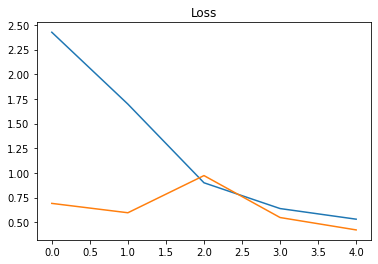

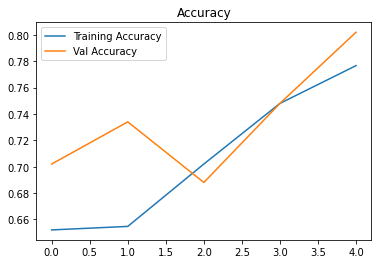

In [25]:
plot_loss_curves(history3)

In [37]:
import tensorflow as tf
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255., rotation_range = 0.2, shear_range=0.2, zoom_range = 0.2, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size = (224,224), batch_size = 32, class_mode='binary', shuffle = False)

Found 1500 images belonging to 2 classes.


Showing image number:23


(-0.5, 223.5, 223.5, -0.5)

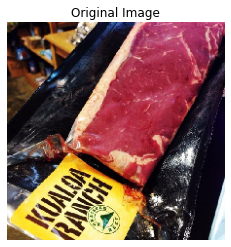

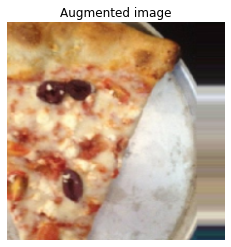

In [41]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
import random
random_number = random.randint(0, 32)
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)


In [46]:
tf.random.set_seed(42)
aug_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)), 
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'), 
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')])
aug_model.compile(loss= tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'] )
history_aug = aug_model.fit(train_data_augmented, epochs = 5, steps_per_epoch=len(train_data_augmented), validation_data = valid_data, validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 22s 469ms/step - loss: 0.8048 - accuracy: 0.4707 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6936 - accuracy: 0.4927 - val_loss: 0.6928 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6936 - accuracy: 0.4747 - val_loss: 0.6928 - val_accuracy: 0.5040
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5080
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6934 - accuracy: 0.4447 - val_loss: 0.6924 - val_accuracy: 0.5180


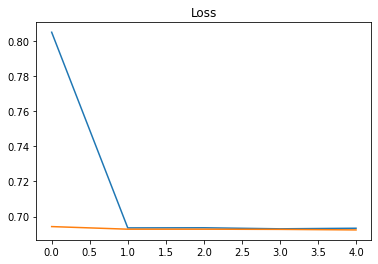

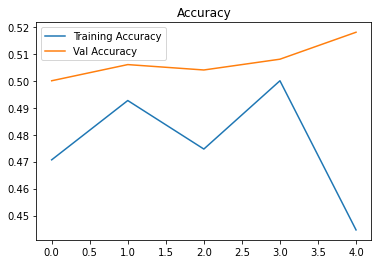

In [47]:
plot_loss_curves(history_aug)

In [50]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224),
                                                                            class_mode = 'binary', batch_size = 32, shuffle = True)

Found 1500 images belonging to 2 classes.


In [52]:
model_aug_shuffled =  tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)), 
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'), 
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')])
model_aug_shuffled.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history_mas = model_aug_shuffled.fit(train_data_augmented_shuffled,  epochs = 5, steps_per_epoch=len(train_data_augmented), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6394 - accuracy: 0.6040 - val_loss: 0.5065 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5329 - accuracy: 0.7413 - val_loss: 0.3865 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4893 - accuracy: 0.7713 - val_loss: 0.3611 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5195 - accuracy: 0.7467 - val_loss: 0.3756 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4839 - accuracy: 0.7773 - val_loss: 0.3767 - val_accuracy: 0.8360


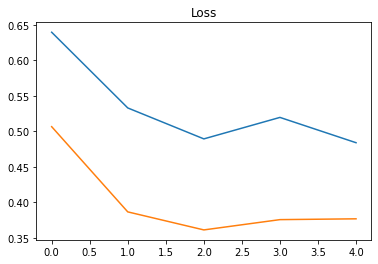

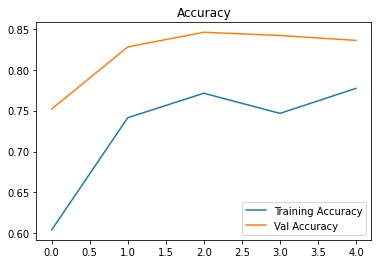

In [53]:
plot_loss_curves(history_mas)

In [55]:
model_imp_accuracy =  tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)), 
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'), 
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'),
                                     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')])
model_imp_accuracy.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history_imp_accuracy = model_imp_accuracy.fit(train_data_augmented_shuffled,  epochs = 10, steps_per_epoch=len(train_data_augmented), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 22s 466ms/step - loss: 0.6582 - accuracy: 0.5587 - val_loss: 0.6060 - val_accuracy: 0.6400
Epoch 2/10
47/47 [==============================] - 22s 464ms/step - loss: 0.5726 - accuracy: 0.6987 - val_loss: 0.4057 - val_accuracy: 0.8400
Epoch 3/10
47/47 [==============================] - 22s 468ms/step - loss: 0.4961 - accuracy: 0.7613 - val_loss: 0.3613 - val_accuracy: 0.8540
Epoch 4/10
47/47 [==============================] - 22s 466ms/step - loss: 0.4520 - accuracy: 0.8000 - val_loss: 0.3448 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4297 - accuracy: 0.8127 - val_loss: 0.3081 - val_accuracy: 0.8820
Epoch 6/10
47/47 [==============================] - 22s 461ms/step - loss: 0.4389 - accuracy: 0.7973 - val_loss: 0.4198 - val_accuracy: 0.7940
Epoch 7/10
47/47 [==============================] - 22s 465ms/step - loss: 0.4355 - accuracy: 0.7953 - val_loss: 0.2767 - val_accuracy: 0.8900

['pizza' 'steak']


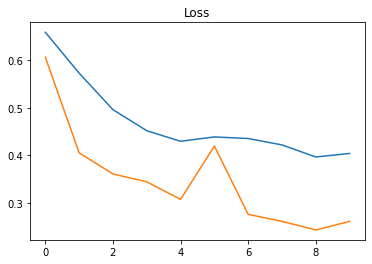

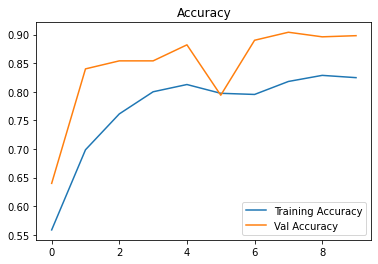

In [64]:
plot_loss_curves(history_imp_accuracy)
print(class_names)


/content/pizza.jpg: Scheme missing.


(259, 194, 3)

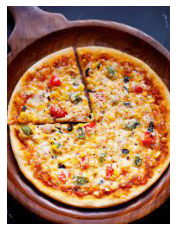

In [62]:
!wget /content/pizza.jpg
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

pizza = mpimg.imread("pizza.jpg")
plt.imshow(pizza)
plt.axis(False)
pizza.shape

In [70]:
def load_preprocess(filename, imshape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[imshape, imshape])
  img = img/255.
  return img

In [71]:
pizza = load_preprocess('pizza.jpg')
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.17071079, 0.06875   , 0.08051471],
        [0.19915938, 0.0971986 , 0.1089633 ],
        [0.24001853, 0.13063972, 0.14762151],
        ...,
        [0.12337306, 0.1640043 , 0.2581046 ],
        [0.11661446, 0.16078432, 0.24705882],
        [0.11372549, 0.16078432, 0.24705882]],

       [[0.13982843, 0.03970588, 0.04871324],
        [0.17116596, 0.07104341, 0.08005077],
        [0.210958  , 0.10822692, 0.12306273],
        ...,
        [0.13059984, 0.17244147, 0.26654175],
        [0.11372549, 0.16078432, 0.24705882],
        [0.11372549, 0.16078432, 0.24705882]],

       [[0.09601716, 0.00955882, 0.00955882],
        [0.12490644, 0.03599987, 0.03477575],
        [0.16608018, 0.07496854, 0.07820542],
        ...,
        [0.13205019, 0.17389183, 0.26901788],
        [0.11525735, 0.16231617, 0.25103897],
        [0.11525735, 0.16231617, 0.2485907 ]],

       ...,

       [[0.0252451 , 0.02132353, 0.06703431],
        [0.03

In [73]:
pred = model_imp_accuracy.predict(tf.expand_dims(pizza, axis=0))

In [74]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [81]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_preprocess(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Predicted class: {pred_class}")
  plt.axis(False)

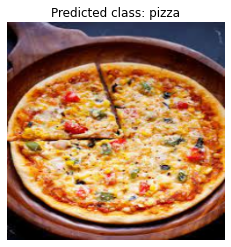

In [82]:
pred_and_plot(model_imp_accuracy, 'pizza.jpg')